Prueba de normalidad (Shapiro-Wilk): Estadístico=0.9127873182296753, p-valor=0.004601166117936373
Prueba de log-normalidad (Shapiro-Wilk): Estadístico=0.9703354239463806, p-valor=0.3688017725944519


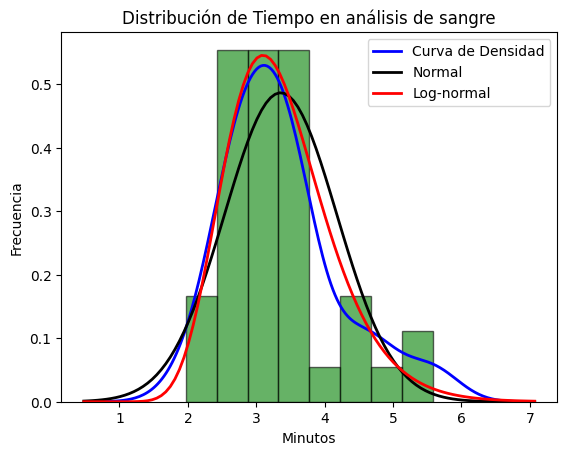

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm, lognorm

# Lista de análisis de sangre
data = [
    3.31, 2.3, 3.63, 3.32, 3.56, 4.54, 4.64, 3.03, 2.67, 3.37, 
    2.92, 2.57, 3.61, 3.15, 3.75, 2.6, 3.34, 2.83, 2.35, 2.87, 
    3.15, 3.25, 2.79, 3.47, 2.98, 1.97, 3.18, 2.66, 3.6, 3.66, 
    2.66, 4.55, 5.57, 2.53, 3.09, 4.04, 3.51, 4.91, 2.76, 5.58
]

# 1. Prueba de Normalidad
stat_norm, p_norm = shapiro(data)
print(f"Prueba de normalidad (Shapiro-Wilk): Estadístico={stat_norm}, p-valor={p_norm}")

# 2. Prueba de Log-normalidad (log-transformación y Shapiro-Wilk)
log_data = np.log(data)
stat_lognorm, p_lognorm = shapiro(log_data)
print(f"Prueba de log-normalidad (Shapiro-Wilk): Estadístico={stat_lognorm}, p-valor={p_lognorm}")

# Crear el histograma con la curva de densidad
plt.hist(data, bins=8, edgecolor='black', density=True, alpha=0.6, color='g')  # Cambié bins a 8
sns.kdeplot(data, color='blue', linewidth=2, label='Curva de Densidad')

# Ajuste y gráfico de la distribución normal
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'k', linewidth=2, label="Normal")

# Ajuste y gráfico de la distribución log-normal
shape, loc, scale = lognorm.fit(data, floc=0)
p_lognorm = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, p_lognorm, 'r', linewidth=2, label="Log-normal")

# Añadir título y etiquetas
plt.title('Distribución de Tiempo en análisis de sangre')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()



Prueba de normalidad (Shapiro-Wilk): Estadístico=0.7665196657180786, p-valor=1.4777620016559467e-08
Prueba de log-normalidad (Shapiro-Wilk): Estadístico=0.971969485282898, p-valor=0.16696672141551971

Prueba de hipótesis para la distribución exponencial negativa (K-S):
Estadístico K-S: 0.2720124297955696
p-valor: 0.0001522856771841963


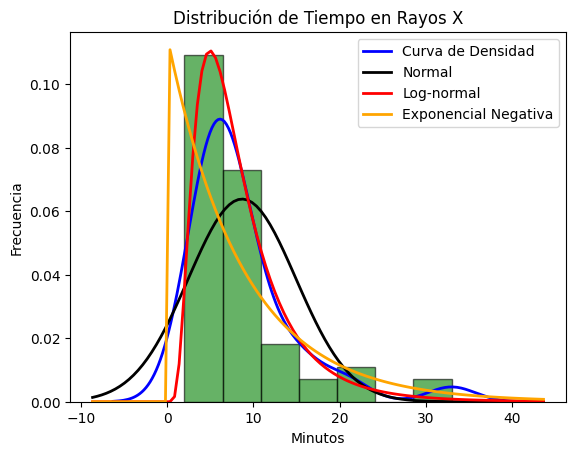

Parámetros de la distribución log-normal:
Shape: 0.6057249217533365
Loc: 0
Scale: 7.158531967228638


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm, lognorm, expon, kstest

# Lista de Rayos-X
data = [
    16, 10, 5, 5, 9, 2, 7, 6, 9, 6, 3, 9, 8, 10, 10, 9, 4, 5, 3, 14, 
    5, 6, 7, 6, 6, 12, 6, 10, 6, 6, 5, 5, 6, 16, 7, 8, 21, 33, 5, 4, 
    4, 2, 7, 8, 21, 33, 5, 4, 4, 2, 7, 6, 3, 20, 8, 10, 5, 10, 7, 13, 
    15, 15
]

# 1. Prueba de Normalidad
stat_norm, p_norm = shapiro(data)
print(f"Prueba de normalidad (Shapiro-Wilk): Estadístico={stat_norm}, p-valor={p_norm}")

# 2. Prueba de Log-normalidad (log-transformación y Shapiro-Wilk)
log_data = np.log(data)
stat_lognorm, p_lognorm = shapiro(log_data)
print(f"Prueba de log-normalidad (Shapiro-Wilk): Estadístico={stat_lognorm}, p-valor={p_lognorm}")

# Test de hipótesis para la distribución exponencial negativa usando Kolmogorov-Smirnov
ks_stat_exp, ks_pvalue_exp = kstest(data, 'expon', args=(loc_exp, scale_exp))
print(f"\nPrueba de hipótesis para la distribución exponencial negativa (K-S):")
print(f"Estadístico K-S: {ks_stat_exp}")
print(f"p-valor: {ks_pvalue_exp}")


# Crear el histograma con la curva de densidad
plt.hist(data, bins=7, edgecolor='black', density=True, alpha=0.6, color='g')
sns.kdeplot(data, color='blue', linewidth=2, label='Curva de Densidad')

# Ajuste y gráfico de la distribución normal
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'k', linewidth=2, label="Normal")

# Ajuste y gráfico de la distribución log-normal
shape, loc, scale = lognorm.fit(data, floc=0)
p_lognorm = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, p_lognorm, 'r', linewidth=2, label="Log-normal")

# Ajuste y gráfico de la distribución exponencial negativa
loc_exp, scale_exp = expon.fit(data, floc=0)
p_expon = expon.pdf(x, loc_exp, scale_exp)
plt.plot(x, p_expon, 'orange', linewidth=2, label="Exponencial Negativa")

# Añadir título y etiquetas
plt.title('Distribución de Tiempo en Rayos X')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

# Imprimir los parámetros de la distribución log-normal
print(f'Parámetros de la distribución log-normal:')
print(f'Shape: {shape}')
print(f'Loc: {loc}')
print(f'Scale: {scale}')


Prueba de normalidad (Shapiro-Wilk): Estadístico=0.8961835503578186, p-valor=0.00199232273735106
Prueba de log-normalidad (Shapiro-Wilk): Estadístico=0.9490082263946533, p-valor=0.08259309828281403
Prueba de Exponencial Negativa (Shapiro-Wilk): Estadístico=0.9440034031867981, p-valor=0.05656735226511955


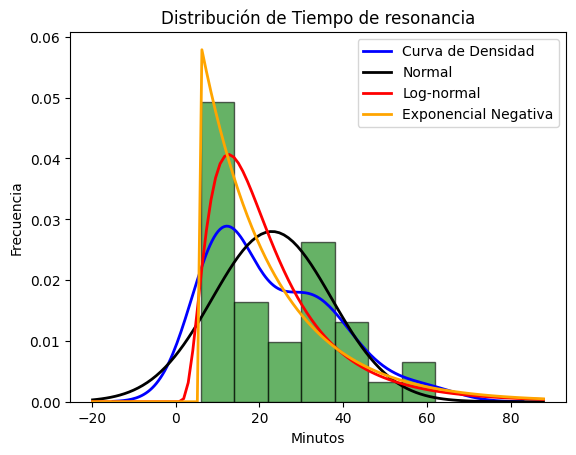

Parámetros de la distribución exponencial negativa:
Loc: 6.0
Scale: 17.0


In [29]:
# Lista de Resonancia
data = [
    54, 30, 11, 13, 35, 23, 38, 31, 42, 62, 32, 32, 14, 24, 6, 16, 
    38, 11, 12, 11, 42, 7, 33, 8, 10, 9, 12, 30, 17, 47, 30, 8, 11, 
    22, 9, 12, 14, 18
]

# 1. Prueba de Normalidad
stat_norm, p_norm = shapiro(data)
print(f"Prueba de normalidad (Shapiro-Wilk): Estadístico={stat_norm}, p-valor={p_norm}")

# 2. Prueba de Log-normalidad (log-transformación y Shapiro-Wilk)
log_data = np.log(data)
stat_lognorm, p_lognorm = shapiro(log_data)
print(f"Prueba de log-normalidad (Shapiro-Wilk): Estadístico={stat_lognorm}, p-valor={p_lognorm}")

# Crear el histograma con la curva de densidad
plt.hist(data, bins=7, edgecolor='black', density=True, alpha=0.6, color='g')
sns.kdeplot(data, color='blue', linewidth=2, label='Curva de Densidad')

# Ajuste y gráfico de la distribución normal
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'k', linewidth=2, label="Normal")

# Ajuste y gráfico de la distribución log-normal
shape, loc, scale = lognorm.fit(data, floc=0)
p_lognorm = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, p_lognorm, 'r', linewidth=2, label="Log-normal")

# Ajuste de la distribución exponencial negativa
loc_exp, scale_exp = expon.fit(data)

# Añadir la curva de la distribución exponencial negativa al gráfico
p_expon = expon.pdf(x, loc_exp, scale_exp)
plt.plot(x, p_expon, 'orange', linewidth=2, label="Exponencial Negativa")

# Test de hipótesis para la distribución exponencial negativa usando Shapiro-Wilk
# Se realizará el test en los datos log-transformados
stat_expon, p_expon = shapiro(np.log(expon.rvs(loc=loc_exp, scale=scale_exp, size=len(data))))
print(f"Prueba de Exponencial Negativa (Shapiro-Wilk): Estadístico={stat_expon}, p-valor={p_expon}")

# Añadir título y etiquetas
plt.title('Distribución de Tiempo de resonancia')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

# Imprimir los parámetros de la distribución exponencial negativa
print(f'Parámetros de la distribución exponencial negativa:')
print(f'Loc: {loc_exp}')
print(f'Scale: {scale_exp}')


Prueba de normalidad (Shapiro-Wilk): Estadístico=0.8878915309906006, p-valor=0.00047158205416053534
Prueba de log-normalidad (Shapiro-Wilk): Estadístico=0.9429136514663696, p-valor=0.030155299231410027


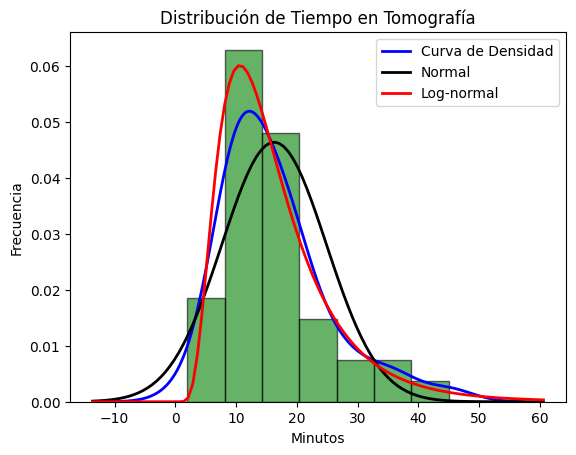

Parámetros de la distribución log-normal:
Shape (σ): 0.5398779363104406
Loc: 0
Scale (e^μ): 14.225579561236593


In [30]:
# Lista de nuevos datos
data = [
    18, 20, 25, 10, 7, 17, 13, 20, 29, 17, 36, 24, 13, 10, 13, 7, 2, 10, 30, 15,
    15, 18, 18, 18, 36, 24, 9, 45, 12, 9, 10, 10, 8, 8, 12, 15, 10, 21, 13, 18,
    11, 19, 11, 10
]

# 1. Prueba de Normalidad
stat_norm, p_norm = shapiro(data)
print(f"Prueba de normalidad (Shapiro-Wilk): Estadístico={stat_norm}, p-valor={p_norm}")

# 2. Prueba de Log-normalidad (log-transformación y Shapiro-Wilk)
log_data = np.log(data)
stat_lognorm, p_lognorm = shapiro(log_data)
print(f"Prueba de log-normalidad (Shapiro-Wilk): Estadístico={stat_lognorm}, p-valor={p_lognorm}")

# Crear el histograma con la curva de densidad
plt.hist(data, bins=7, edgecolor='black', density=True, alpha=0.6, color='g')
sns.kdeplot(data, color='blue', linewidth=2, label='Curva de Densidad')

# Ajuste y gráfico de la distribución normal
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'k', linewidth=2, label="Normal")

# Ajuste y gráfico de la distribución log-normal
shape, loc, scale = lognorm.fit(data, floc=0)
p_lognorm = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, p_lognorm, 'r', linewidth=2, label="Log-normal")

# Añadir título y etiquetas
plt.title('Distribución de Tiempo en Tomografía')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

# Imprimir los parámetros ajustados de la distribución log-normal
print(f'Parámetros de la distribución log-normal:')
print(f'Shape (σ): {shape}')
print(f'Loc: {loc}')
print(f'Scale (e^μ): {scale}')

Prueba de normalidad (Shapiro-Wilk): Estadístico=0.6743114590644836, p-valor=4.567896338958377e-10
Prueba de log-normalidad (Shapiro-Wilk): Estadístico=0.9569817781448364, p-valor=0.03844362124800682


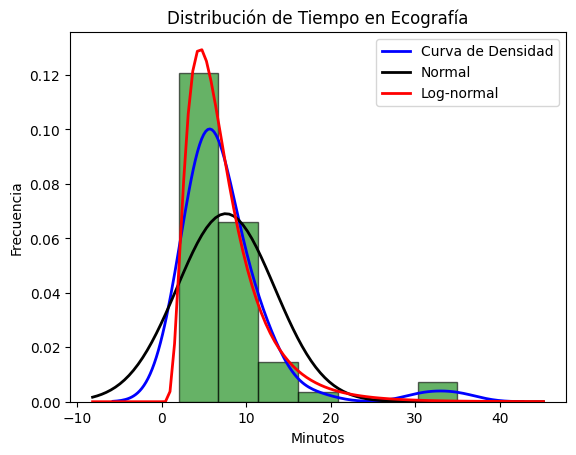

Parámetros de la distribución log-normal:
Shape (σ): 0.5755550032942254
Loc: 0
Scale (e^μ): 6.3077697406383


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm, lognorm

# Lista de nuevos datos
data = [
    11, 6, 8, 7, 35, 3, 11, 6, 13, 31, 11, 5, 8, 13, 2, 5, 4, 8, 5, 4,
    9, 4, 6, 5, 11, 5, 3, 18, 6, 3, 6, 5, 3, 7, 7, 8, 6, 5, 13, 5,
    7, 7, 6, 10, 3, 8, 3, 12, 8, 5, 2, 6, 9, 2, 6, 5, 5, 5
]

# 1. Prueba de Normalidad
stat_norm, p_norm = shapiro(data)
print(f"Prueba de normalidad (Shapiro-Wilk): Estadístico={stat_norm}, p-valor={p_norm}")

# 2. Prueba de Log-normalidad (log-transformación y Shapiro-Wilk)
log_data = np.log(data)
stat_lognorm, p_lognorm = shapiro(log_data)
print(f"Prueba de log-normalidad (Shapiro-Wilk): Estadístico={stat_lognorm}, p-valor={p_lognorm}")

# Crear el histograma con la curva de densidad
plt.hist(data, bins=7, edgecolor='black', density=True, alpha=0.6, color='g')
sns.kdeplot(data, color='blue', linewidth=2, label='Curva de Densidad')

# Ajuste y gráfico de la distribución normal
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'k', linewidth=2, label="Normal")

# Ajuste y gráfico de la distribución log-normal
shape, loc, scale = lognorm.fit(data, floc=0)
p_lognorm = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, p_lognorm, 'r', linewidth=2, label="Log-normal")

# Añadir título y etiquetas
plt.title('Distribución de Tiempo en Ecografía')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

# Imprimir los parámetros ajustados de la distribución log-normal
print(f'Parámetros de la distribución log-normal:')
print(f'Shape (σ): {shape}')
print(f'Loc: {loc}')
print(f'Scale (e^μ): {scale}')


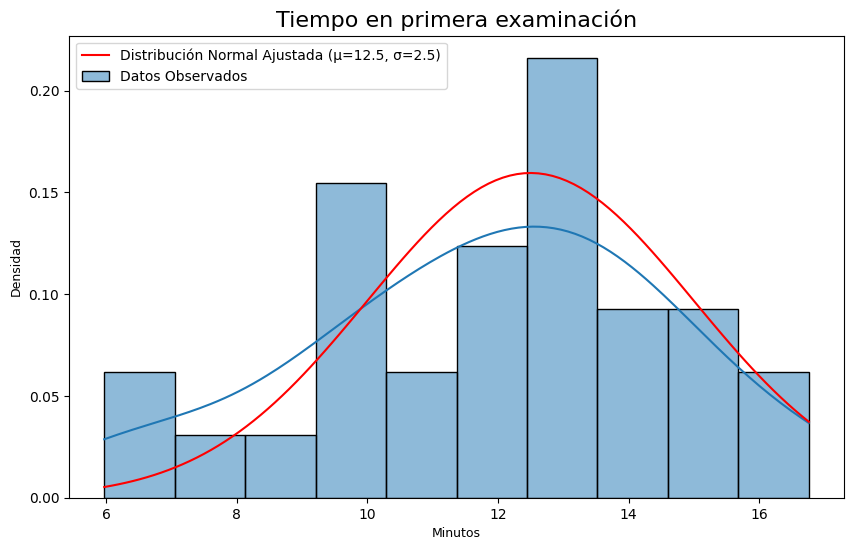

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Generar una muestra aleatoria de 30 datos aproximadamente normales
np.random.seed(42)  # Fijar la semilla para reproducibilidad
sample_size = 30
random_data = np.random.normal(loc=12.5, scale=2.5, size=sample_size)

# Introducir una distorsión para que los datos no sean tan perfectos
random_data = random_data + np.random.normal(loc=0, scale=1.5, size=sample_size)

# Crear el histograma y la curva de densidad
plt.figure(figsize=(10, 6))
sns.histplot(random_data, bins=10, kde=True, stat="density", edgecolor='black', label='Datos Observados')

# Graficar la curva normal ajustada
x = np.linspace(min(random_data), max(random_data), 100)
pdf_normal = norm.pdf(x, loc=12.5, scale=2.5)
plt.plot(x, pdf_normal, 'r-', label='Distribución Normal Ajustada (µ=12.5, σ=2.5)')

# Agregar títulos y etiquetas
plt.title('Tiempo en primera examinación', fontsize=16)
plt.xlabel('Minutos', fontsize=9)
plt.ylabel('Densidad', fontsize=9)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


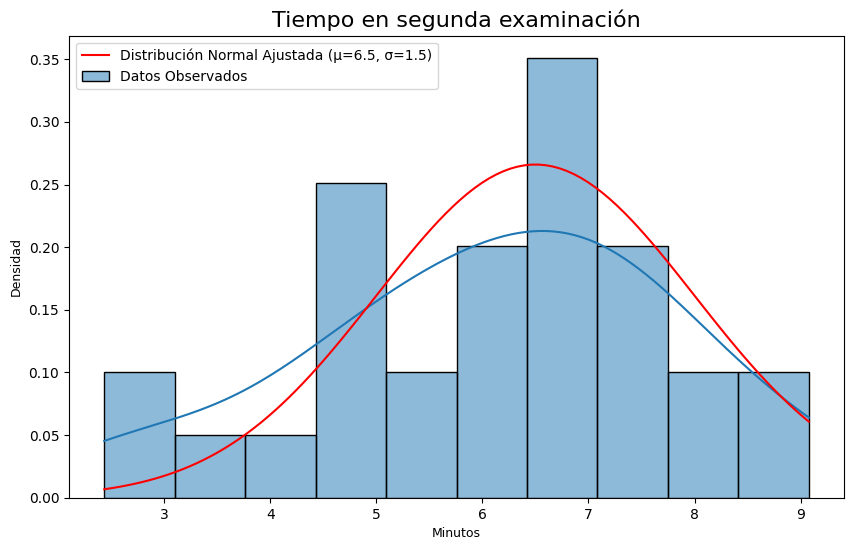

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Generar una muestra aleatoria de 30 datos aproximadamente normales
np.random.seed(42)  # Fijar la semilla para reproducibilidad
sample_size = 30
random_data = np.random.normal(loc=6.5, scale=1.5, size=sample_size)

# Introducir una distorsión para que los datos no sean tan perfectos
random_data = random_data + np.random.normal(loc=0, scale=1.0, size=sample_size)

# Crear el histograma y la curva de densidad
plt.figure(figsize=(10, 6))
sns.histplot(random_data, bins=10, kde=True, stat="density", edgecolor='black', label='Datos Observados')

# Graficar la curva normal ajustada
x = np.linspace(min(random_data), max(random_data), 100)
pdf_normal = norm.pdf(x, loc=6.5, scale=1.5)
plt.plot(x, pdf_normal, 'r-', label='Distribución Normal Ajustada (µ=6.5, σ=1.5)')

# Agregar títulos y etiquetas
plt.title('Tiempo en segunda examinación', fontsize=16)
plt.xlabel('Minutos', fontsize=9)
plt.ylabel('Densidad', fontsize=9)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
